In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/instagram_reach.csv")
# data.to_csv("Insta Reviews.csv")

data = pd.read_csv(r"D:\PFP\Projects\Advanced Projects\Instagram Algorithm\Insta Reviews.csv",index_col="S.No")
data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"],inplace=True)
data.head()


,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
data["Time since posted"] = data["Time since posted"].str.replace(" hours","").astype("float")
data

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11.0,139
2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2.0,23
3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2.0,25
4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3.0,49
5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3.0,30
...,...,...,...,...,...,...
19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3.0,31
21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3.0,42
22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3.0,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   USERNAME           100 non-null    object 
 1   Caption            94 non-null     object 
 2   Followers          100 non-null    int64  
 3   Hashtags           100 non-null    object 
 4   Time since posted  100 non-null    float64
 5   Likes              100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("will")

In [6]:
def create_wordclour(col):
    colData = data[col]
    text_cloud = ""

    for i in colData:
        text_cloud = text_cloud + str(i)

    wordcloud = WordCloud(width=800,height=800,min_font_size=10,stopwords=stopwords,background_color="white").generate(text_cloud)

    plt.figure(figsize = (7,7))
    plt.axis("off")
    plt.imshow(wordcloud)


In [7]:
data.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

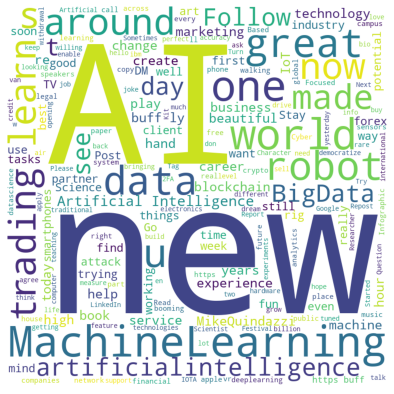

In [8]:
create_wordclour("Caption")

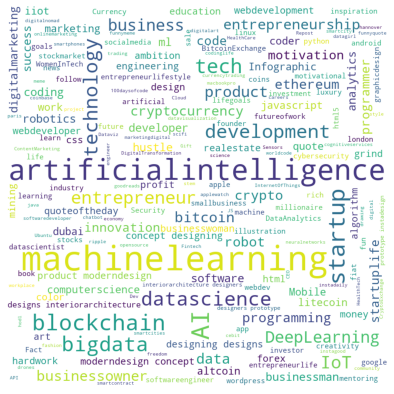

In [9]:
create_wordclour("Hashtags")


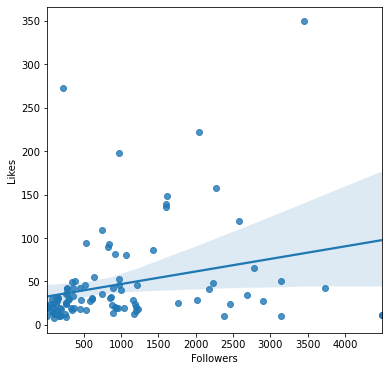

In [10]:
plt.figure(figsize=(6,6))
sns.regplot(data=data,x="Followers",y="Likes")
plt.show()

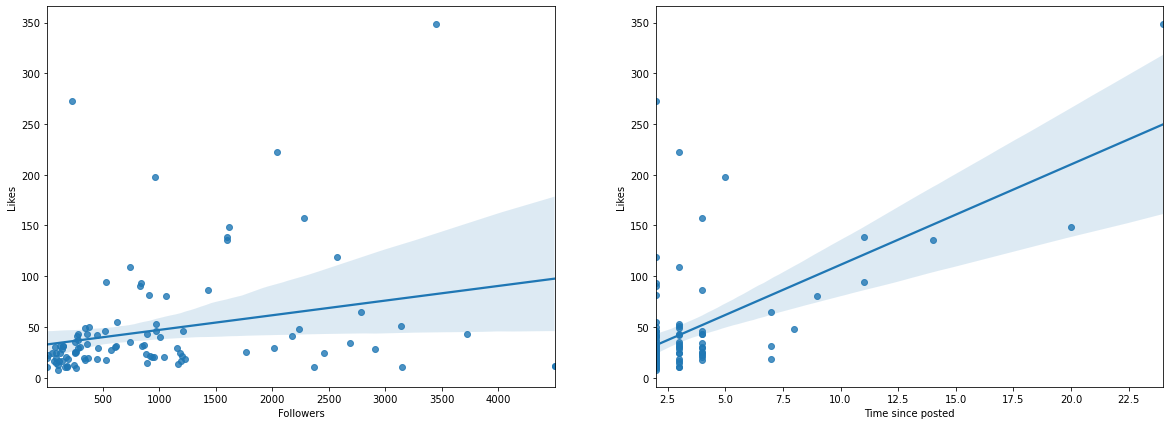

In [11]:
def plot_graph(features):
    plt.figure(figsize=(20, 7))
    j = 1
    for i in features:
        plt.subplot(1, 2, j)
        sns.regplot(data=data, x=i, y='Likes')
        j = j + 1

    plt.show()


plot_graph(['Followers', 'Time since posted'])


In [12]:
x_data = np.array(data[["Followers", "Time since posted"]],dtype="float32")
y_data = np.array(data["Likes"],dtype="float32")
print("Max Value is ",max(y_data))


Max Value is  349.0


In [13]:
X = x_data
y = y_data / max(y_data)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train)
X_test = stdScaler.fit_transform(X_test)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_predict = gbr.predict(X_test)

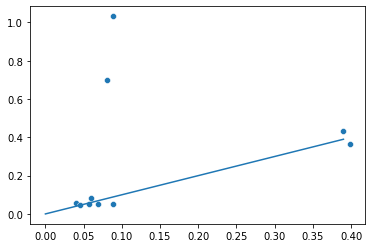

In [16]:
sns.scatterplot(y_test,y_predict)
plt.plot(np.arange(start=0, stop=0.4, step=0.01),np.arange(start=0, stop=0.4, step=0.01))
plt.show()
